## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# We load the dataset using pandas
df = pd.read_csv('ab_data.csv')

# Visualize the first rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# We find the number of rows using shape and extracting the first value
print('There are {} rows in this dataset.'.format(df.shape[0]))

There are 294478 rows in this dataset.


c. The number of unique users in the dataset.

In [4]:
# We use unique method and extract the longitude of the list
print("There are {} unique users in the Dataset.".format(len(df['user_id'].unique())))

There are 290584 unique users in the Dataset.


d. The proportion of users converted.

In [5]:
# Given the converted column is 0's and 1's we can find this by calculating the mean
print("The proportion of users converted is: {}%".format(round(df['converted'].mean() * 100, 2)))

The proportion of users converted is: 11.97%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# First, we query just the data where new_page and treatment don't line up
query = df.query("(landing_page == 'new_page' & group != 'treatment') | (landing_page == 'old_page' & group == 'treatment')")

# Now we check the number of rows
print("In {} rows, new_page and treatment didn't line up.".format(query.shape[0]))


In 3893 rows, new_page and treatment didn't line up.


f. Do any of the rows have missing values?

In [7]:
# Let's check how many missing values there are in each column by using isnull method and the sum of the results
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# We drop in Two times, first new_page and no treatment
df2 = df.drop(df[(df.landing_page == "new_page") & (df.group != "treatment")].index)

# Now old_page and treatment
df2 = df2.drop(df2[(df2.landing_page == "old_page") & (df2.group == "treatment")].index)


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# We use unique method and extract the longitude of the list
print("There are {} unique users in the Dataset.".format(len(df2['user_id'].unique())))

There are 290584 unique users in the Dataset.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# We choose the rows with a duplicated user_id
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# Same again
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# We drop the row of one of the duplicates
df2.drop(index = 1899,inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Same as in the first exercise
print("The proportion of users converted is: {}%".format(round(df['converted'].mean() * 100, 2)))

The proportion of users converted is: 11.97%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# We calculate the mean of the comverted column just in the control rows
df2.query("group == 'control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [109]:
# We calculate the mean of the comverted column just in the treatment rows
df2.query("group == 'treatment'")['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [110]:
# We divide the number of rows on treatment by the number of rows on the whole dataset
df2.query("group == 'treatment'").shape[0] / df2.shape[0]

0.496765944645006

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

I would say that given the really small difference between the conversion rate for control and treatment groups, it's really difficult to perform a clear analysis. It would appear that there's no evidence so far to say that the new page leads to a higher conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $P_{new}$ <= $P_{old}$

$H_{1}$ : $P_{new}$ > $P_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
p_new = round(df2['converted'].mean() * 100, 2)
print("The conversion Rate for the Null Hypothesis is: {}%".format(p_new))

The conversion Rate for the Null Hypothesis is: 11.96%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = round(df2['converted'].mean() * 100, 2)
print("The conversion Rate for the Null Hypothesis is: {}%".format(p_old))

The conversion Rate for the Null Hypothesis is: 11.96%


c. What is $n_{new}$?

In [26]:
df_new = df2.query("landing_page == 'new_page'")
n_new = df_new.shape[0]

print("The number of rows in the new page data is: {}".format(n_new))

The number of rows in the new page data is: 145310


d. What is $n_{old}$?

In [27]:
df_old = df2.query("landing_page == 'old_page'")
n_old = df_old.shape[0]

print("The number of rows in the old page data is: {}".format(n_old))

The number of rows in the old page data is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([0,1], size = n_new, p=[1-0.1196, 0.1196])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([0,1], size = n_old, p=[1-0.1196, 0.1196])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
print("The Difference in means for the simulated data is: {}".format(new_page_converted.mean() - old_page_converted.mean()))

The Difference in means for the simulated data is: -6.883544199240421e-06


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = []
for i in range(10000):
    old_page = np.random.choice([0,1], size = n_old, p=[1-0.1196, 0.1196])
    new_page = np.random.choice([0,1], size = n_new, p=[1-0.1196, 0.1196])
    p_diff = new_page.mean() - old_page.mean()
    p_diffs.append(p_diff)

p_diffs = np.array(p_diffs)



i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

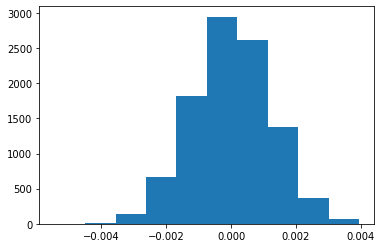

In [35]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
np.array([p_diffs > (df2.query("group == 'treatment'")['converted'].mean() - df2.query("group == 'control'")['converted'].mean())]).mean()

0.9043

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value we just calculated is the p-value. The p-value leads us to reject or not reject the Null hypothesis. In this case, as we can see, we have a really high p-value, which would lead us to Not reject the Null hypothesis, and say that there is not a difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df_old['converted'].sum()
convert_new = df_new['converted'].sum()
n_old = df_old.shape[0]
n_new = df_new.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
sm.stats.proportions_ztest(convert_new, n_new, 0.1196)

(-0.9329938632336952, 0.3508231368727226)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The P-value is again greater than 0.05, so we still do not reject the Null Hypothesis. Z-score would suggest that our values are almost 1 standard deviation away from the mean.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [123]:
# Firstly, we add the intercep
df2['intercept'] = 1

# Dummie variables
df2[['new_page', 'old_page']] = pd.get_dummies(df['landing_page'])

In [124]:
# Now we drop the column old_page since we do not need it and to make the matrix full rank.
df2.drop('old_page', axis = 1)

,user_id,timestamp,group,landing_page,converted,intercept,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [125]:
# We instantiate the model
model = sm.Logit(df2['converted'], df2[['intercept', 'new_page']])

# Now we fit the model
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366142
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [126]:
# And explore the results.
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              214205.8174
Date:               2022-12-02 17:21 BIC:              214226.9899
No. Observations:   292512           Log-Likelihood:   -1.0710e+05
Df Model:           1                LL-Null:          -1.0710e+05
Df Residuals:       292510           LLR p-value:      0.19802    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0147    0.0114    -1.2872  0.1980  -0.0370   0.0077
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P-value for new_page is 0.19, which is still high enough to not reject the Null Hypothesis. 

In the regression model, our Null Hypothesis is that there is not relationship between the X variable (the intercept and the new_page) and the Y variable (if it's converted). In this case, what our p-value is indicating, is that there is a low correlation between the variable new_page and converted. Nevertheless, this relatonship may be higher than the difference of means that we used in our manual model, hence the lower p-value.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Advantages: 

* We can further our understanding of user behaviour and predict conversion better.
* Further the scope of the test into variables that we hadn't considered before and could be of help for next improvements.

Disadvantages:

* We may add confounding factors into the equation, that could blind us from the actual reason for the conversion. 
* We may add correlated variables that bring the performance of our model down. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [127]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [128]:
# Inspect the new data
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0


In [129]:
# Which countries are there?
df_new['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [130]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])


In [131]:
# Instantiate model
model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'new_page']])

#Fit Model
results = model.fit()

# Summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366137
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              214206.7642
Date:               2022-12-02 17:21 BIC:              214249.1092
No. Observations:   292512           Log-Likelihood:   -1.0710e+05
Df Model:           3                LL-Null:          -1.0710e+05
Df Residuals:       292508           LLR p-value:      0.19430    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9897    0.0089  -223.9226  0.0000  -2.0071  -1.9723
CA           -0.0378    0.0268    -1.4111  0.1582  -0.0902   0.0147
UK            0.0110    0.0132     0.8274  0.4080  -0.0150   0.0369
new_page     -0.0146    0.0114    -1.2831  0.1995  -0.0370   0.0077
==================================================================

"""

Seems like adding Countries has not performed any improvemente, since p values are really high. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [132]:
### First we create the interaction Variables
df_new['new_page_CA'] = df_new['new_page'] * df_new['CA']
df_new['new_page_UK'] = df_new['new_page'] * df_new['UK']

In [133]:
# Instantiate model
model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'new_page', 'new_page_CA', 'new_page_UK']])

#Fit Model
results = model.fit()

# Summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366133
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              214208.3184
Date:               2022-12-02 17:21 BIC:              214271.8360
No. Observations:   292512           Log-Likelihood:   -1.0710e+05
Df Model:           5                LL-Null:          -1.0710e+05
Df Residuals:       292506           LLR p-value:      0.20930    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
new_page     -0.0210    0.0136    -1.5447  0.1224  -0.0477   0.0057
new_page_CA  -0.0405    0.0535    -0.7566  0.4493  -0.1454   0.0644
new_page_UK   0.0333    0.0265     1.2580  0.2084  -0.0186   0.0853
==================================================================

"""

Seeems like Neither the country variable nor its interaction with new_page are relevant for our model. This would make sense, since the interaction of two variables that do not seem to be relevant for our model, would tend to not be relevant either.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.